### Business Questions to Answer
1. Who are our most valuable customers? What defines them?
2. Are there distinct customer groups with similar spending behaviors? How can we target
them effectively?
3. What demographic factors (e.g., age, gender, income) influence spending habits?
4. What specific actions can MallCo take to improve retention and boost spending?


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Loading the Dataset

In [2]:
# Load the data
data = pd.read_csv('../data/Mall_Customers.csv')

#### 2. Basic dataset information

In [7]:
# Get a reproducible random sample by setting random_state
sample = data.sample(n=20, random_state=42)
print(sample)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
95           96    Male   24                  60                      52
15           16    Male   22                  20                      79
30           31    Male   60                  30                       4
158         159    Male   34                  78                       1
128         129    Male   59                  71                      11
115         116  Female   19                  65                      50
69           70  Female   32                  48                      47
170         171    Male   40                  87                      13
174         175  Female   52                  88                      13
45           46  Female   24                  39                      65
66           67  Female   43                  48                      50
182         183    Male   46                  98                      15
165         166  Female   36                  85   

1. Basic dataset information:

Dataset Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

2. Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

3. Number of duplicates: 0

4. Basic Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           6

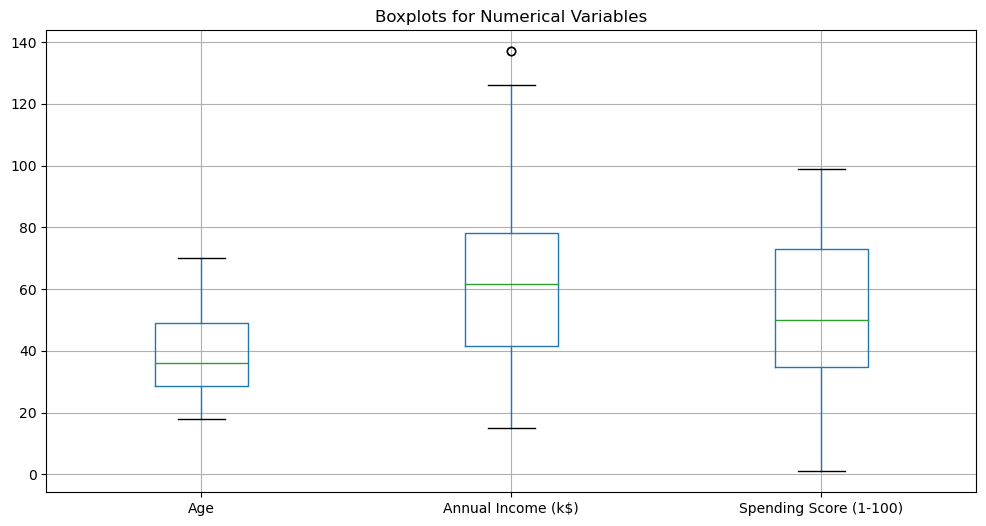


7. Value Ranges:

Age:
Min: 18
Max: 70

Annual Income (k$):
Min: 15
Max: 137

Spending Score (1-100):
Min: 1
Max: 99


In [8]:
# 1. Basic dataset information
print("1. Basic dataset information:")
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

# 2. Check for missing values
print("\n2. Missing Values:")
print(data.isnull().sum())

# 3. Check for duplicates
print("\n3. Number of duplicates:", data.duplicated().sum())

# 4. Basic statistics for numerical columns
print("\n4. Basic Statistics:")
print(data.describe())

# 5. Value counts for categorical columns
print("\n5. Gender Distribution:")
print(data['Gender'].value_counts())

# 6. Check for outliers using boxplots
print("\n6. Visualise outliers using boxplots:")
plt.figure(figsize=(12, 6))
data.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Boxplots for Numerical Variables')
plt.show()

# 7. Check value ranges
print("\n7. Value Ranges:")
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    print(f"\n{column}:")
    print(f"Min: {data[column].min()}")
    print(f"Max: {data[column].max()}")

#### 3. Understanding correlations in the dataset

In [11]:
# Calculate correlations between numerical columns
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = data[numerical_cols].corr()
print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


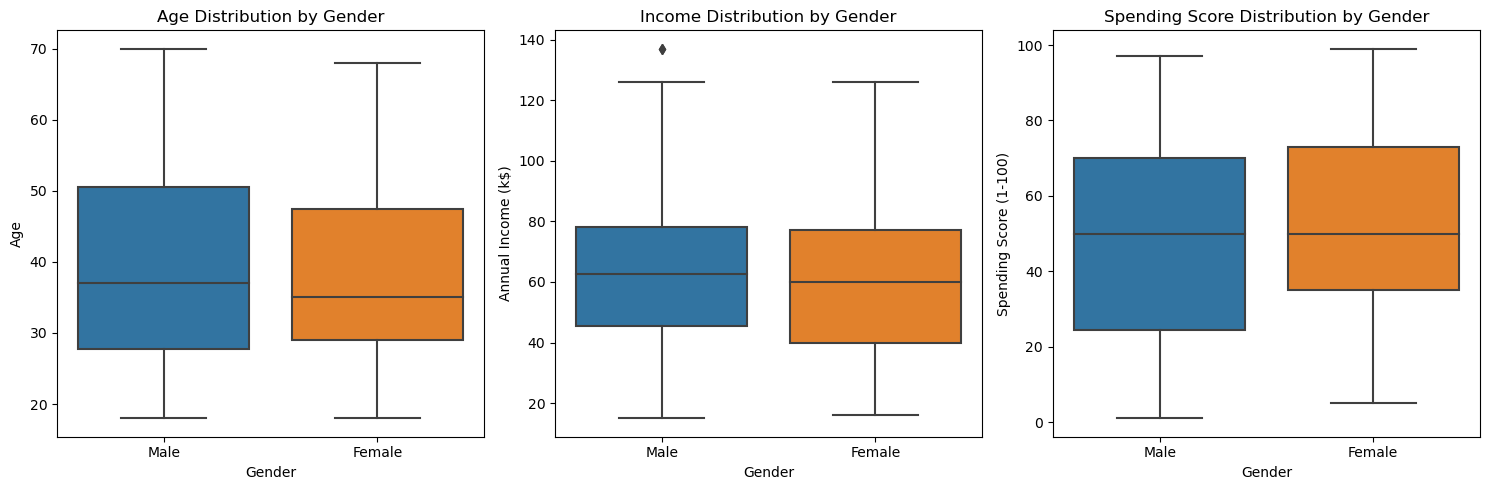

In [12]:
# Create box plots for numerical variables by gender
plt.figure(figsize=(15, 5))

# Age distribution by Gender
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Gender', y='Age')
plt.title('Age Distribution by Gender')

# Annual Income distribution by Gender
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Gender', y='Annual Income (k$)')
plt.title('Income Distribution by Gender')

# Spending Score distribution by Gender
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()

#### 4. Univariate analysis

##### Distribution plots for numerical variables & summary statistics

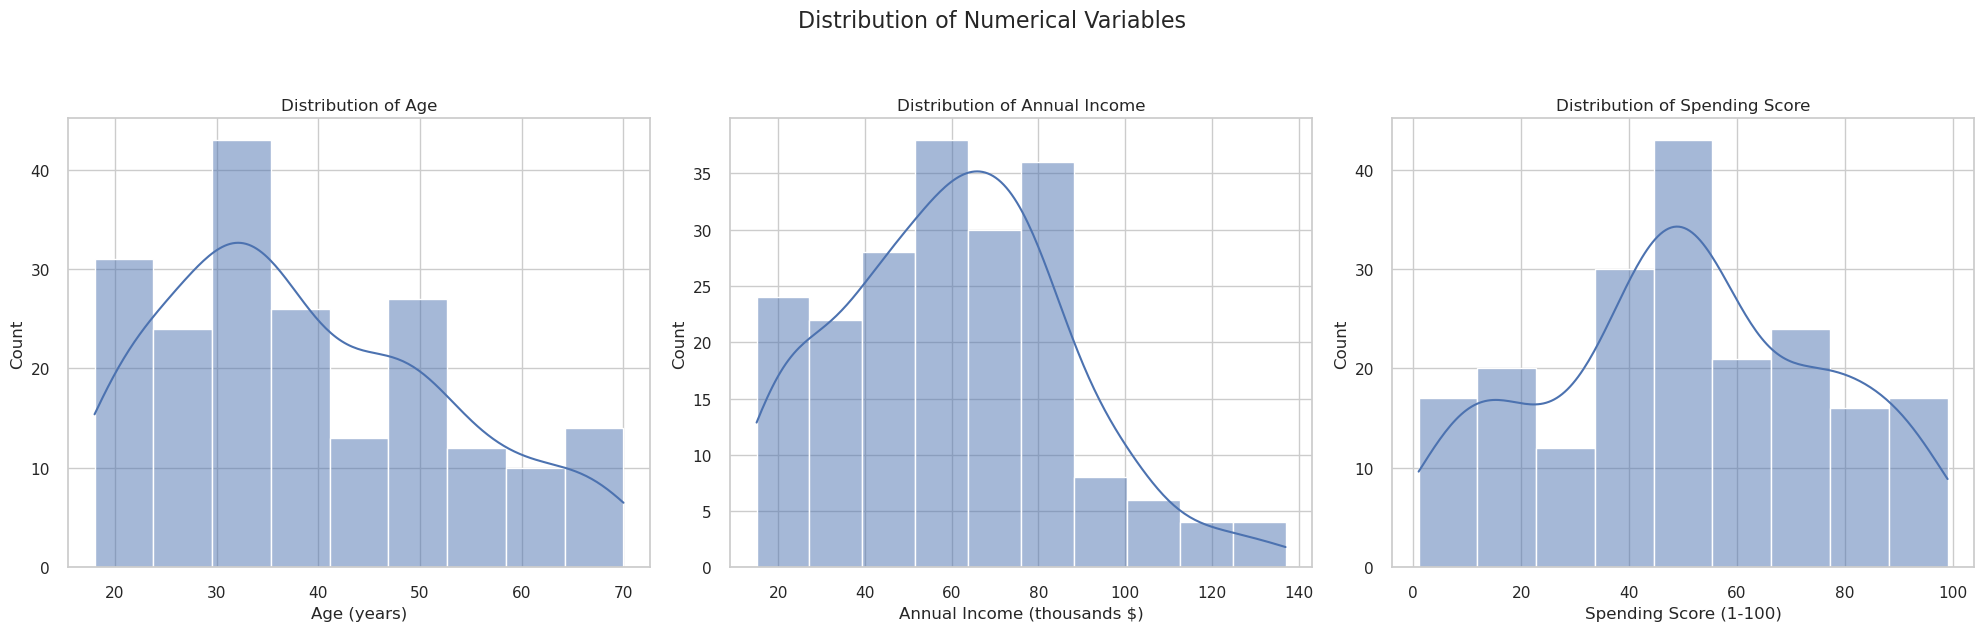


Summary Statistics for Numerical Variables:

Age Statistics:
count    200.00
mean      38.85
std       13.97
min       18.00
25%       28.75
50%       36.00
75%       49.00
max       70.00
Name: Age, dtype: float64

Annual Income Statistics:
count    200.00
mean      60.56
std       26.26
min       15.00
25%       41.50
50%       61.50
75%       78.00
max      137.00
Name: Annual Income (k$), dtype: float64

Spending Score Statistics:
count    200.00
mean      50.20
std       25.82
min        1.00
25%       34.75
50%       50.00
75%       73.00
max       99.00
Name: Spending Score (1-100), dtype: float64

Mode Values:
Age Mode: 32
Annual Income Mode: 54
Spending Score Mode: 42


In [17]:
# Set up the plotting style
sns.set_style("whitegrid")
sns.set_context("notebook")

# 1. Distribution Plots for Numerical Variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.05)

# Age Distribution
sns.histplot(data=data, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Count')

# Annual Income Distribution
sns.histplot(data=data, x='Annual Income (k$)', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Annual Income')
axes[1].set_xlabel('Annual Income (thousands $)')
axes[1].set_ylabel('Count')

# Spending Score Distribution
sns.histplot(data=data, x='Spending Score (1-100)', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics for numerical variables
print("\nSummary Statistics for Numerical Variables:")
print("\nAge Statistics:")
print(data['Age'].describe().round(2))
print("\nAnnual Income Statistics:")
print(data['Annual Income (k$)'].describe().round(2))
print("\nSpending Score Statistics:")
print(data['Spending Score (1-100)'].describe().round(2))

# Print mode for each numerical variable
print("\nMode Values:")
print("Age Mode:", data['Age'].mode().values[0])
print("Annual Income Mode:", data['Annual Income (k$)'].mode().values[0])
print("Spending Score Mode:", data['Spending Score (1-100)'].mode().values[0])

##### Categorical analysis

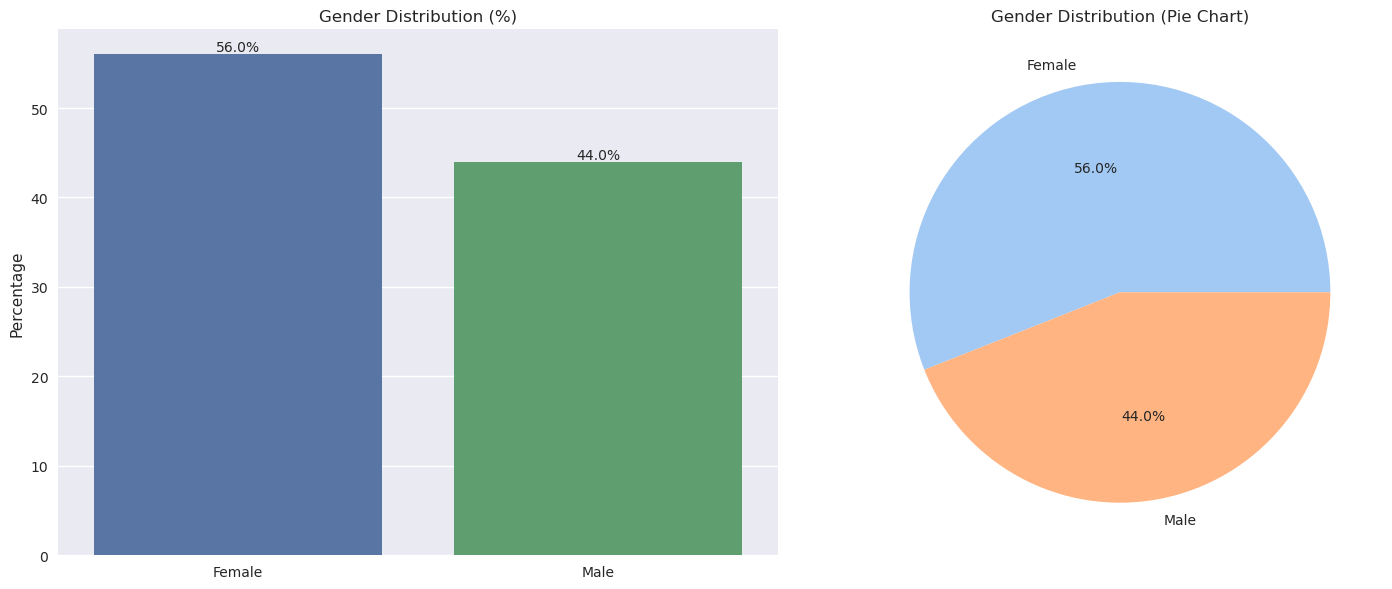

In [16]:
# 2. Categorical Analysis (Gender)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot with percentages
gender_counts = data['Gender'].value_counts()
gender_percentages = (gender_counts / len(data) * 100).round(1)

sns.barplot(x=gender_percentages.index, y=gender_percentages.values, ax=ax1)
ax1.set_title('Gender Distribution (%)')
ax1.set_ylabel('Percentage')
# Add percentage labels on top of each bar
for i, v in enumerate(gender_percentages):
    ax1.text(i, v, f'{v}%', ha='center', va='bottom')

# Pie chart
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'))
ax2.set_title('Gender Distribution (Pie Chart)')

plt.tight_layout()
plt.show()



#### Multivariate analysis

##### Scatter plots & correlation by categorical variable (gender)

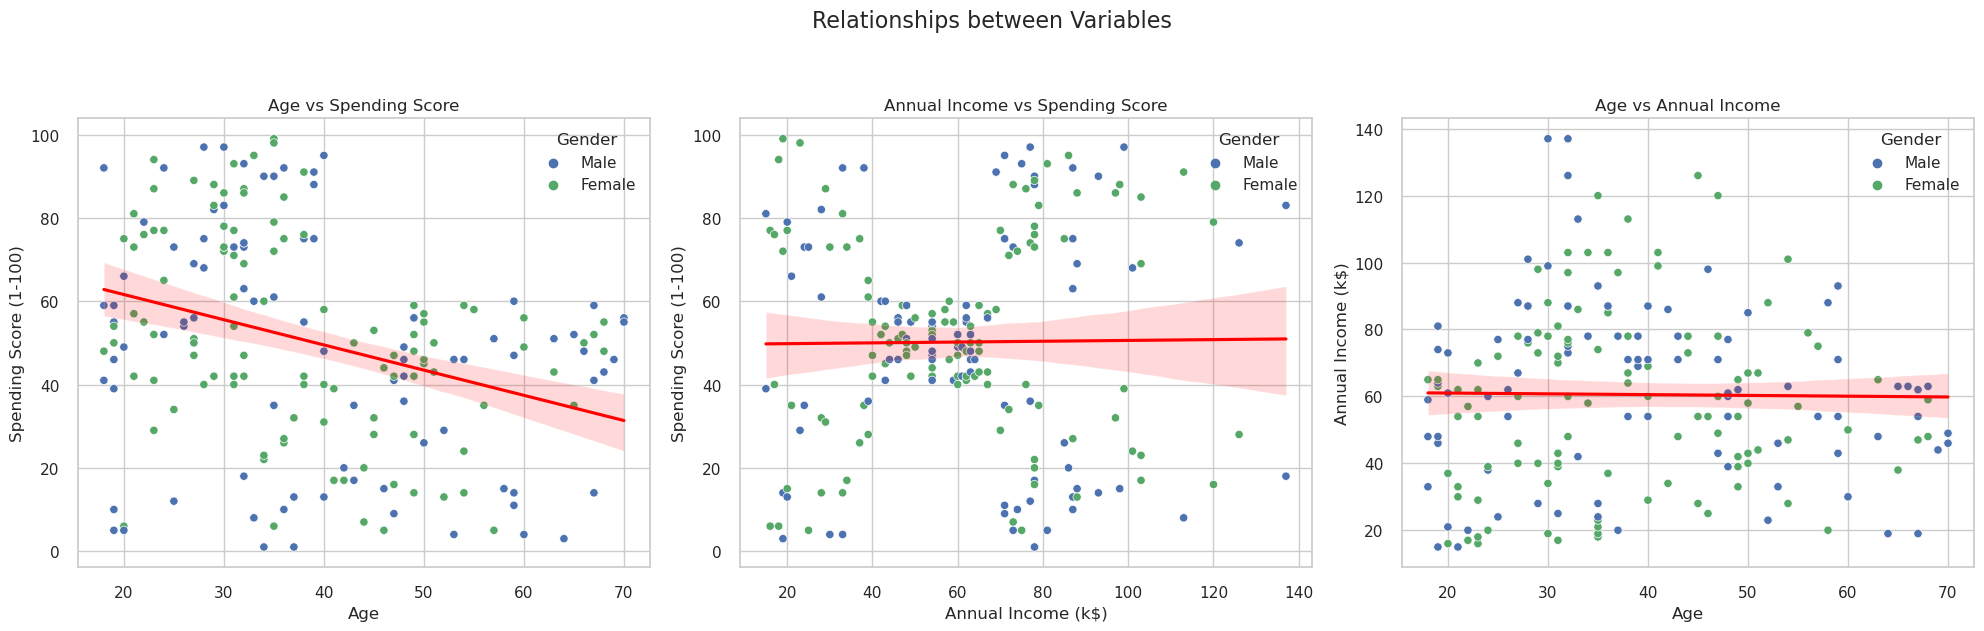


Correlation Coefficients:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000              -0.012                  -0.327
Annual Income (k$)     -0.012               1.000                   0.010
Spending Score (1-100) -0.327               0.010                   1.000

Correlations by Gender:

Male Customers:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000              -0.093                  -0.280
Annual Income (k$)     -0.093               1.000                  -0.024
Spending Score (1-100) -0.280              -0.024                   1.000

Female Customers:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000               0.060                  -0.375
Annual Income (k$)      0.060               1.000                   0.048
Spending Score (1-100) -0.375               0.048                   1.000


In [18]:
# Create scatter plots with trend lines
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relationships between Variables', fontsize=16, y=1.05)

# 1. Age vs Spending Score
sns.scatterplot(data=data, 
                x='Age', 
                y='Spending Score (1-100)',
                hue='Gender',  # Color points by gender
                ax=axes[0])
sns.regplot(data=data,
            x='Age',
            y='Spending Score (1-100)',
            scatter=False,  # Don't add points again
            color='red',
            ax=axes[0])
axes[0].set_title('Age vs Spending Score')

# 2. Annual Income vs Spending Score
sns.scatterplot(data=data,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Gender',
                ax=axes[1])
sns.regplot(data=data,
            x='Annual Income (k$)',
            y='Spending Score (1-100)',
            scatter=False,
            color='red',
            ax=axes[1])
axes[1].set_title('Annual Income vs Spending Score')

# 3. Age vs Annual Income
sns.scatterplot(data=data,
                x='Age',
                y='Annual Income (k$)',
                hue='Gender',
                ax=axes[2])
sns.regplot(data=data,
            x='Age',
            y='Annual Income (k$)',
            scatter=False,
            color='red',
            ax=axes[2])
axes[2].set_title('Age vs Annual Income')

plt.tight_layout()
plt.show()

# Print correlation coefficients
print("\nCorrelation Coefficients:")
correlations = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlations.round(3))

# Additional insights: Calculate correlations by gender
print("\nCorrelations by Gender:")
for gender in data['Gender'].unique():
    print(f"\n{gender} Customers:")
    gender_corr = data[data['Gender'] == gender][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
    print(gender_corr.round(3))

##### Interpretation & take aways

1. Age vs Spending Score (Left Plot):
- There's a negative correlation (-0.327 overall) between age and spending score
- The red trend line slopes downward, indicating that as age increases, spending score tends to decrease
- This relationship is stronger for females (-0.375) than males (-0.280)
- The pink shaded area around the trend line represents the confidence interval
- There's considerable scatter around the trend line, suggesting other factors influence spending
- Annual Income vs Spending Score (Middle Plot):
- There's virtually no correlation (0.010 overall) between income and spending score
- The nearly horizontal red line confirms this lack of relationship
- The wide confidence interval (pink shading) suggests high variability
- Interesting pattern: The points seem to form clusters, suggesting distinct customer segments
- Slight gender difference: females show a weak positive correlation (0.048) while males show a weak negative correlation (-0.024)

2. Annual Income vs Spending Score (Middle Plot):
- There's virtually no correlation (0.010 overall) between income and spending score
- The nearly horizontal red line confirms this lack of relationship
- The wide confidence interval (pink shading) suggests high variability
- Interesting pattern: The points seem to form clusters, suggesting distinct customer segments
- Slight gender difference: females show a weak positive correlation (0.048) while males show a weak negative correlation (-0.024)

3. Age vs Annual Income (Right Plot):
- Almost no correlation (-0.012 overall) between age and income
- Slightly different patterns by gender:
- Males show a weak negative correlation (-0.093)
- Females show a weak positive correlation (0.060)
- The flat trend line suggests income doesn't systematically change with age
- Wide spread of points indicates high income variability at all ages

4. Gender-Based Insights:
- Female Customers:
- Stronger negative relationship between age and spending (-0.375)
- Slight positive relationship between income and spending (0.048)
- Slight positive relationship between age and income (0.060)
- Male Customers:
- Moderate negative relationship between age and spending (-0.280)
- Slight negative relationship between income and spending (-0.024)
- Slight negative relationship between age and income (-0.093)

##### Group analysis

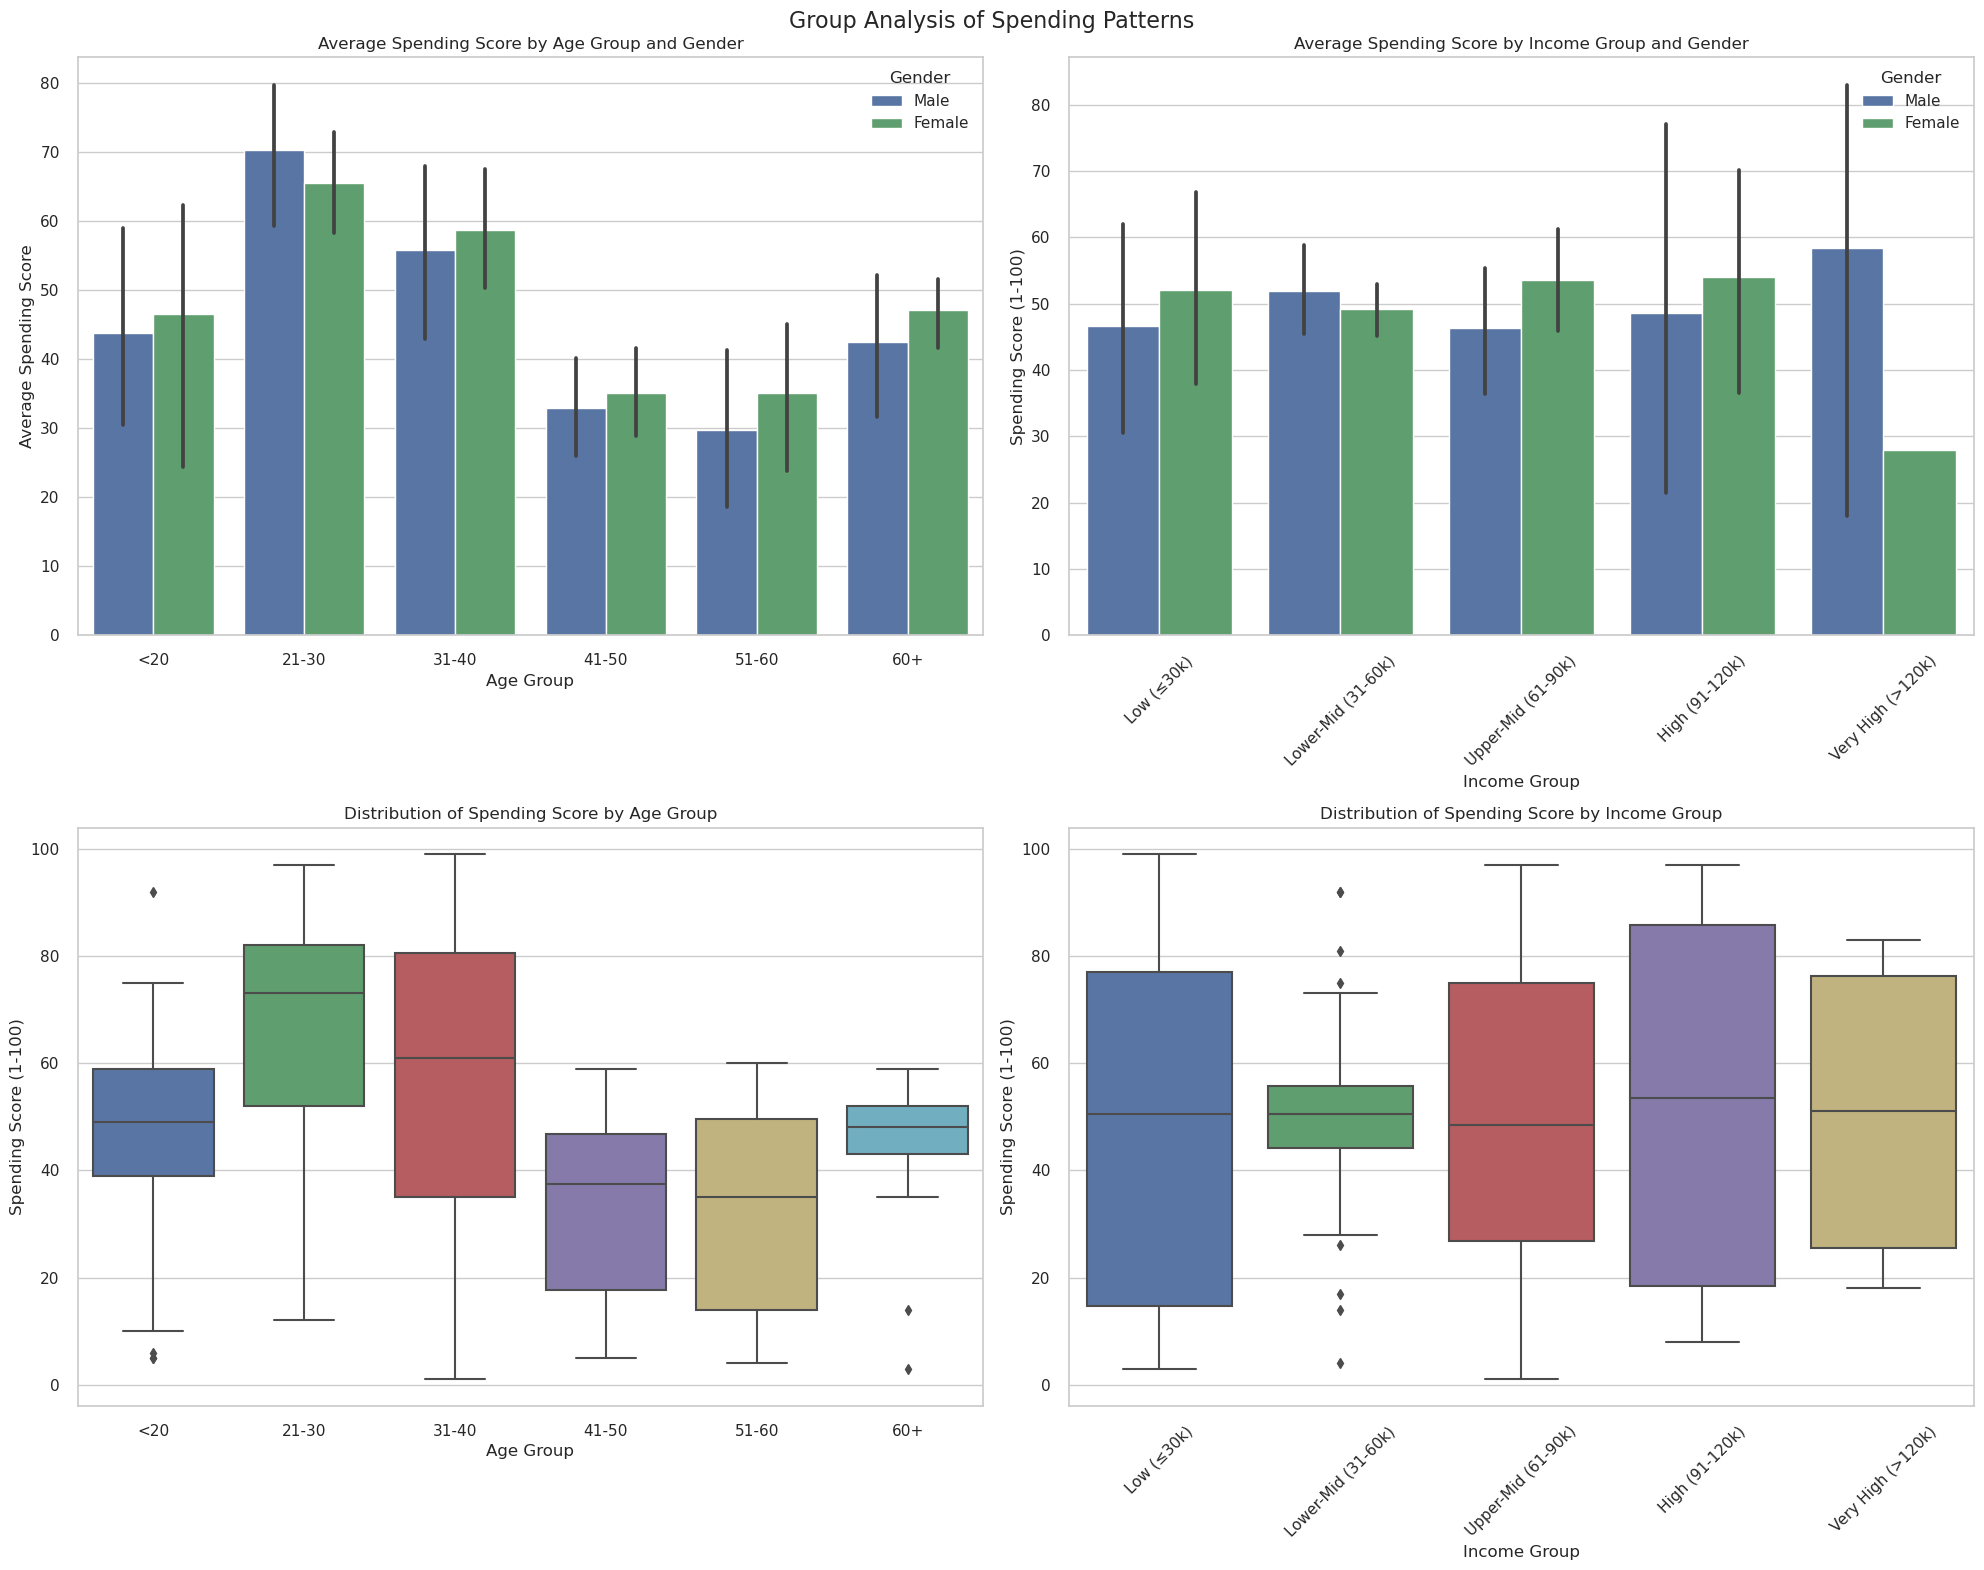


Summary Statistics by Age Group:
            mean    std  count
Age_Group                     
<20        44.65  25.21     17
21-30      67.22  19.93     45
31-40      57.50  28.88     60
41-50      34.39  15.93     38
51-60      32.52  20.09     23
60+        44.18  14.86     17

Summary Statistics by Income Group:
                     mean    std  count
Income_Group                           
Low (≤30k)          49.66  32.44     32
Lower-Mid (31-60k)  50.20  14.54     66
Upper-Mid (61-90k)  49.92  28.42     80
High (91-120k)      52.28  33.67     18
Very High (>120k)   50.75  32.51      4

Summary Statistics by Age Group and Gender:
                   mean    std  count
Age_Group Gender                     
<20       Female  46.60  25.12      5
          Male    43.83  26.32     12
21-30     Female  65.52  19.26     29
          Male    70.31  21.38     16
31-40     Female  58.71  25.72     35
          Male    55.80  33.28     25
41-50     Female  35.16  16.90     25
          Male

In [22]:
# 1. Create age brackets
data['Age_Group'] = pd.cut(data['Age'], 
                          bins=[0, 20, 30, 40, 50, 60, 100],
                          labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

# 2. Create income brackets
data['Income_Group'] = pd.cut(data['Annual Income (k$)'],
                             bins=[0, 30, 60, 90, 120, 150],
                             labels=['Low (≤30k)', 'Lower-Mid (31-60k)', 
                                   'Upper-Mid (61-90k)', 'High (91-120k)', 'Very High (>120k)'])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Group Analysis of Spending Patterns', fontsize=16, y=0.98)

# 1. Average Spending Score by Age Group and Gender
sns.barplot(data=data, x='Age_Group', y='Spending Score (1-100)', 
            hue='Gender', ax=axes[0,0])
axes[0,0].set_title('Average Spending Score by Age Group and Gender')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Average Spending Score')

# 2. Average Spending Score by Income Group and Gender
sns.barplot(data=data, x='Income_Group', y='Spending Score (1-100)', 
            hue='Gender', ax=axes[0,1])
axes[0,1].set_title('Average Spending Score by Income Group and Gender')
axes[0,1].set_xlabel('Income Group')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Box Plot of Spending Score by Age Group
sns.boxplot(data=data, x='Age_Group', y='Spending Score (1-100)', ax=axes[1,0])
axes[1,0].set_title('Distribution of Spending Score by Age Group')
axes[1,0].set_xlabel('Age Group')

# 4. Box Plot of Spending Score by Income Group
sns.boxplot(data=data, x='Income_Group', y='Spending Score (1-100)', ax=axes[1,1])
axes[1,1].set_title('Distribution of Spending Score by Income Group')
axes[1,1].set_xlabel('Income Group')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by Age Group:")
age_group_stats = data.groupby('Age_Group')['Spending Score (1-100)'].agg(['mean', 'std', 'count']).round(2)
print(age_group_stats)

print("\nSummary Statistics by Income Group:")
income_group_stats = data.groupby('Income_Group')['Spending Score (1-100)'].agg(['mean', 'std', 'count']).round(2)
print(income_group_stats)

print("\nSummary Statistics by Age Group and Gender:")
age_gender_stats = data.groupby(['Age_Group', 'Gender'])['Spending Score (1-100)'].agg(['mean', 'std', 'count']).round(2)
print(age_gender_stats)

##### Interpretation and takeaways
1. Average Spending Score by Age Group and Gender (Top Left):
- Age Group Trends:
  - Highest spending scores are in the 21-30 age group for both genders
  - There's a general declining trend as age increases
  - The 60+ group shows a slight uptick compared to 51-60 group
- Gender Differences:
  - Males in the 21-30 age group have slightly higher spending than females
  - Females tend to have slightly higher spending in older age groups (41+ years)
  - The gender gap is most pronounced in the 60+ category

2. Average Spending Score by Income Group and Gender (Top Right):
- Income Group Patterns:
  - Spending scores are relatively consistent across low to high-income groups
  - Notable exception: Very High income group (>120k) shows a large gender disparity
  - Males in the Very High income group spend significantly more than females
- Gender Differences:
  - Females show relatively stable spending across income groups
  - Males show more variation, especially in the highest income bracket
  - Middle-income groups show the most similar spending between genders

3. Distribution of Spending Score by Age Group (Bottom Left):
- Box Plot Interpretation:
  - The boxes show the interquartile range (25th to 75th percentile)
  - The line inside each box is the median
  - The whiskers show the range of typical values
  - Individual points are outliers
- Key Observations:
  - 21-30 age group has the highest median and largest spread
  - 41-50 and 51-60 groups show the lowest median spending
  - Younger age groups show more variability in spending
  - Some outliers present, especially in older age groups

4. Distribution of Spending Score by Income Group (Bottom Right):
- Box Plot Patterns:
  - All income groups show wide spending score distributions
  - Median spending scores are relatively similar across income groups
  - Considerable overlap in spending patterns across income levels
  - Several outliers present in most income groups

#### Key takeaways and Business Implications

Key Takeaways:
1. Age appears to be a stronger predictor of spending behavior than income
2. Young adults (21-30) are the highest spenders regardless of gender
3. Income level surprisingly doesn't strongly correlate with spending patterns
4. Gender differences become more pronounced in certain age and income segments
5. There's significant individual variation within each group (shown by the spread in box plots)

Business Implications:
1. Marketing strategies might be more effective when age-targeted rather than income-targeted
2. The 21-30 age group represents a key demographic for high spending
3. Different approaches might be needed for male and female customers in the highest income bracket
4. The wide variation in spending within groups suggests opportunity for personalized marketing